In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Dropout, Flatten, Dense

# Create a Sequential model
model = Sequential()

# Add the first convolutional layer
model.add(Conv2D(32, (3, 3), input_shape=(128, 128, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Add the second convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Add the third convolutional layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Add the fourth convolutional layer
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flatten the output before the fully connected layers
model.add(Flatten())

# Add the first fully connected layer
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Add the output layer
model.add(Dense(2, activation='softmax'))

# Print the model summary
model.summary()


2024-02-15 20:29:29.642755: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-15 20:29:29.642850: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-15 20:29:29.790623: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 126, 126, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 63, 63, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 61, 61, 64)        2

In [2]:
import zipfile
import os

zip_file_path = '/kaggle/input/dogs-vs-cats-redux-kernels-edition/train.zip'
extracted_folder_path = '/kaggle/working/train'

# Create the extracted folder if it doesn't exist
os.makedirs(extracted_folder_path, exist_ok=True)

# Open the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Extract all the contents into the specified folder
    zip_ref.extractall(extracted_folder_path)

print(f"Extraction completed. Files are in: {extracted_folder_path}")

Extraction completed. Files are in: /kaggle/working/train


In [3]:
import os
import shutil

source_folder = '/kaggle/working/train/train'
output_folder = '/kaggle/working/trainfinal'

# Create "dog" and "cat" subfolders if they don't exist
os.makedirs(os.path.join(output_folder, 'dog'), exist_ok=True)
os.makedirs(os.path.join(output_folder, 'cat'), exist_ok=True)

# Iterate through files in the "train" folder
for filename in os.listdir(source_folder):
    source_path = os.path.join(source_folder, filename)
    
    # Check if the file starts with 'dog' or 'cat' and move it accordingly
    if filename.startswith('dog'):
        shutil.move(source_path, os.path.join(output_folder, 'dog', filename))
    elif filename.startswith('cat'):
        shutil.move(source_path, os.path.join(output_folder, 'cat', filename))

print("Image classification completed.")


Image classification completed.


GPU is available. Using GPU for training.
Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.
Epoch 1/15


2024-02-15 20:29:58.355669: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
I0000 00:00:1708029001.729567      97 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


625/625 [==============================] - 43s 57ms/step - loss: 0.7180 - accuracy: 0.6517 - val_loss: 0.9702 - val_accuracy: 0.5292
Epoch 2/15
625/625 [==============================] - 34s 55ms/step - loss: 0.5014 - accuracy: 0.7588 - val_loss: 0.6062 - val_accuracy: 0.7085
Epoch 3/15
625/625 [==============================] - 35s 55ms/step - loss: 0.4269 - accuracy: 0.8007 - val_loss: 0.4559 - val_accuracy: 0.7885
Epoch 4/15
625/625 [==============================] - 34s 55ms/step - loss: 0.3776 - accuracy: 0.8314 - val_loss: 0.4030 - val_accuracy: 0.8247
Epoch 5/15
625/625 [==============================] - 35s 56ms/step - loss: 0.3429 - accuracy: 0.8490 - val_loss: 0.3447 - val_accuracy: 0.8468
Epoch 6/15
625/625 [==============================] - 34s 54ms/step - loss: 0.3131 - accuracy: 0.8630 - val_loss: 0.4531 - val_accuracy: 0.7774
Epoch 7/15
625/625 [==============================] - 36s 57ms/step - loss: 0.2746 - accuracy: 0.8820 - val_loss: 0.3312 - val_accuracy: 0.8572
Epo

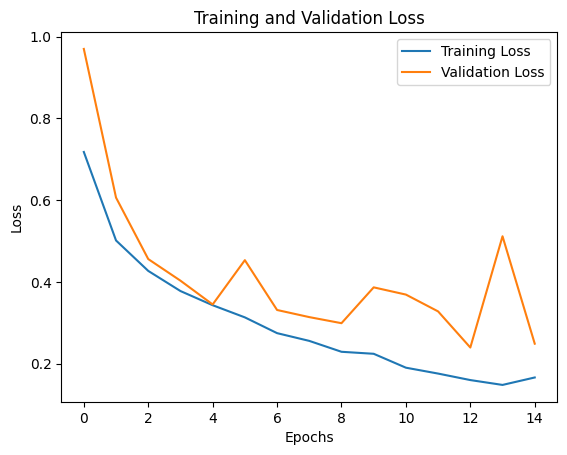

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Validation Accuracy: 89.80%


In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Check if GPU is available
if tf.config.list_physical_devices('GPU'):
    print("GPU is available. Using GPU for training.")
else:
    print("GPU is not available. Make sure TensorFlow GPU version is installed.")

# Set the path to the folder containing the training images
train_data_dir = '/kaggle/working/trainfinal'

# Set the image dimensions and batch size
img_width, img_height = 128, 128
batch_size = 32

# Create a data generator for training without augmentation
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Generate batches of training data without augmentation
train_generator = train_datagen.flow_from_directory(train_data_dir,
                                                    target_size=(img_width, img_height),
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    subset='training')

# Create a validation data generator
validation_generator = train_datagen.flow_from_directory(train_data_dir,
                                                         target_size=(img_width, img_height),
                                                         batch_size=batch_size,
                                                         class_mode='categorical',
                                                         subset='validation')

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
epochs = 15
history = model.fit(train_generator,
                    steps_per_epoch=train_generator.samples // batch_size,
                    epochs=epochs,
                    validation_data=validation_generator,
                    validation_steps=validation_generator.samples // batch_size)

# Plot training loss and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Save the trained model
model.save('BASIL_HAWASH_47592_MODEL.h5')

# Evaluate the model
score = model.evaluate(validation_generator, verbose=0)
print(f"Validation Accuracy: {score[1]*100:.2f}%")


157/157 [==============================] - 1s 5ms/step


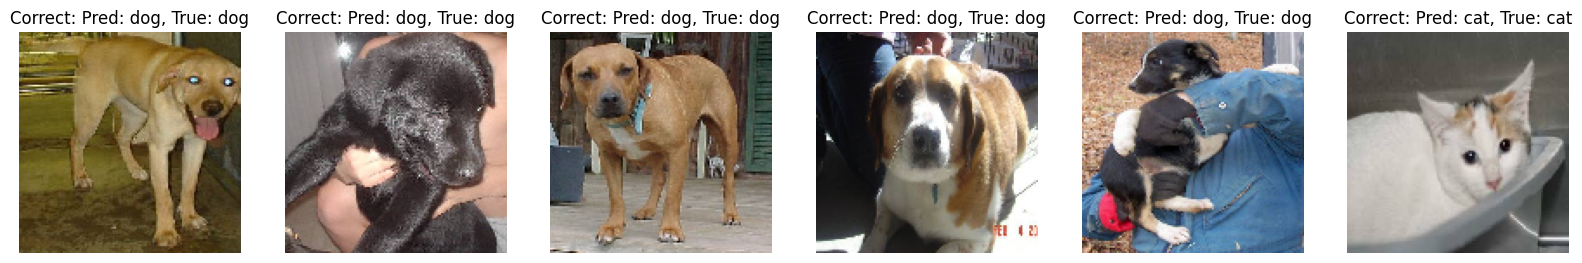

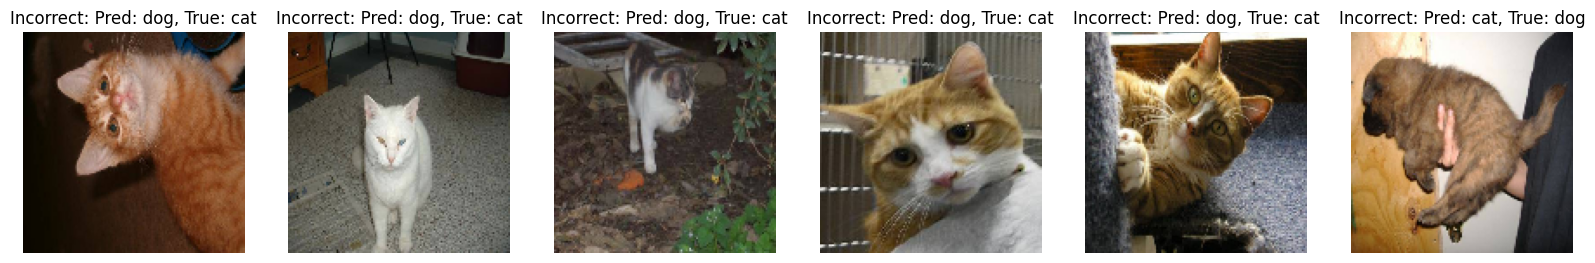

In [5]:
import numpy as np

def plot_images(images, predicted_labels, true_labels, title_prefix):
    plt.figure(figsize=(20, 4))
    class_labels = ['cat', 'dog']  # Assuming 0: cat, 1: dog
    for i in range(len(images)):
        plt.subplot(1, len(images), i+1)
        plt.imshow(images[i])
        plt.title(f"{title_prefix}Pred: {class_labels[predicted_labels[i]]}, True: {class_labels[true_labels[i]]}")
        plt.axis('off')
    plt.show()

# Load all images from the validation generator to ensure enough examples
all_images = []
all_true_labels = []
for _ in range(len(validation_generator)):
    imgs, labels = next(validation_generator)
    all_images.append(imgs)
    all_true_labels.append(labels)
all_images = np.vstack(all_images)
all_true_labels = np.vstack(all_true_labels)

# Predict the classes
predictions = model.predict(all_images)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(all_true_labels, axis=1)

# Identify correctly and incorrectly classified images
correct_indices = np.where(predicted_classes == true_classes)[0]
incorrect_indices = np.where(predicted_classes != true_classes)[0]

if len(correct_indices) >= 6 and len(incorrect_indices) >= 6:
    # Select 6 correctly and incorrectly classified images
    selected_correct_indices = correct_indices[:6]
    selected_incorrect_indices = incorrect_indices[:6]

    correct_images = all_images[selected_correct_indices]
    incorrect_images = all_images[selected_incorrect_indices]

    # Plotting
    plot_images(correct_images, predicted_classes[selected_correct_indices], true_classes[selected_correct_indices], "Correct: ")
    plot_images(incorrect_images, predicted_classes[selected_incorrect_indices], true_classes[selected_incorrect_indices], "Incorrect: ")
else:
    print("Not enough examples to display 6 of each type.")

1/1 [==============================] - 0s 289ms/step


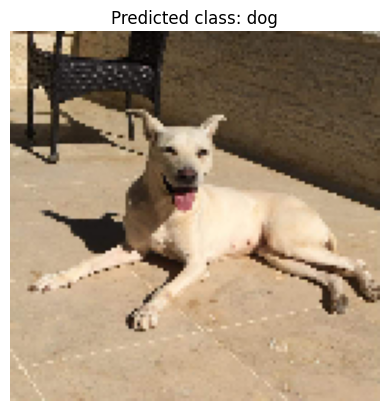

The image is predicted to be a dog.


In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load the saved model
model_path = '/kaggle/working/BASIL_HAWASH_47592_MODEL.h5'
model = tf.keras.models.load_model(model_path)

def predict_image_class(image_path):
    # Load and preprocess the image
    img = image.load_img(image_path, target_size=(128, 128))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Create a batch
    img_array /= 255.0  # Rescale pixel values to match the [0, 1] range
    
    # Make a prediction
    prediction = model.predict(img_array)
    
    # Assuming the model's final layer is softmax and the class indices are [0, 1] where 0 is cat and 1 is dog
    class_names = ['cat', 'dog']
    predicted_class = class_names[np.argmax(prediction)]
    
    # Plot the image and prediction
    plt.imshow(img)
    plt.title(f"Predicted class: {predicted_class}")
    plt.axis('off')
    plt.show()

    return predicted_class

# Example usage
image_path = '/kaggle/input/lucytest/lucy.png'  # Update this to the path of your image
predicted_class = predict_image_class(image_path)
print(f"The image is predicted to be a {predicted_class}.")
